In [21]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = 8, 8
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/ga-students/DSI-CHI-1/master/lessons/week-03/3.2-regularization-lab/assets/datasets/salary.dat?token=AADi62oNxlBW8m25S59C6CQeObBKlzU0ks5YCPlgwA%3D%3D', delim_whitespace=True)

In [6]:
# data

In [33]:
dummy_data = pd.get_dummies(data, columns=['rk', 'sx', 'dg'])

In [34]:
dummy_data

,yr,yd,sl,rk_assistant,rk_associate,rk_full,sx_female,sx_male,dg_doctorate,dg_masters
0,25,35,36350,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,13,22,35350,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,10,23,28200,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,7,27,26775,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,19,30,33696,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,16,21,28516,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,0,32,24900,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,16,18,31909,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8,13,30,31850,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9,13,31,32850,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [35]:
dummy_data['rk_assistant'].value_counts()

0.0    34
1.0    18
Name: rk_assistant, dtype: int64

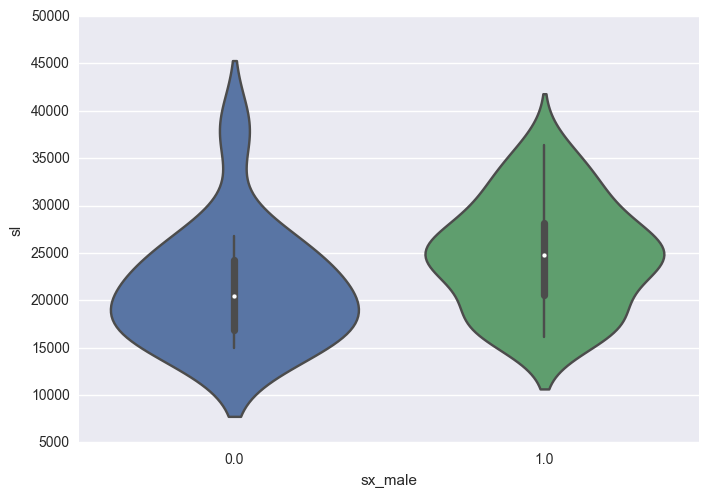

In [36]:
ax = sns.violinplot(x="sx_male", y="sl", data=dummy_data)

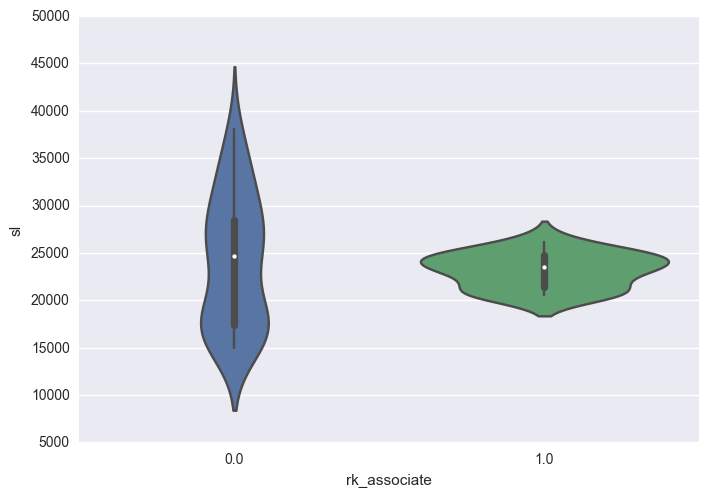

In [37]:
ax = sns.violinplot(x="rk_associate", y="sl", data=dummy_data)

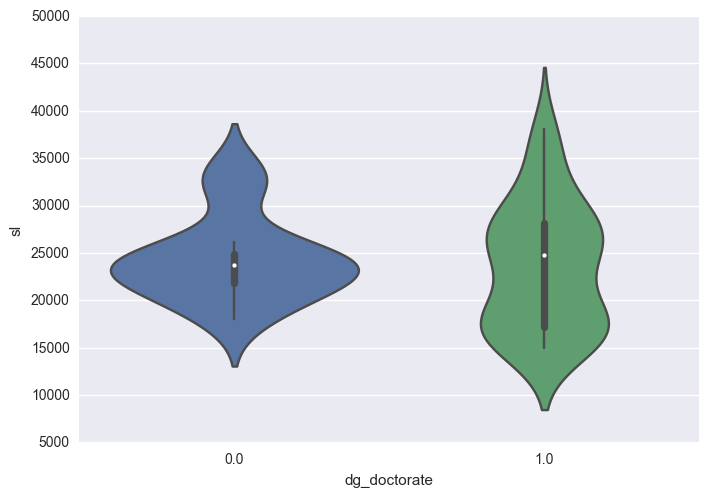

In [38]:
ax = sns.violinplot(x="dg_doctorate", y="sl", data=dummy_data)

In [77]:
subset = data.sample(frac=0.1, replace=False)

x = subset[[u'yr', u'yd']]
y = subset[u'sl']
lm = linear_model.LinearRegression()
model = lm.fit(x, y)
predictions = model.predict(x)
print "Sample:", model.score(x, y)

x = data[[u'yr', u'yd']]
y = data[u'sl']
print "All data with sample model:", model.score(x, y)

x = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10])
model = lm.fit(x, y)
predictions = model.predict(x)
print "Sample with regularization:", model.score(x, y)

x = data[[u'yr', u'yd']]
y = data[u'sl']
print "All data with regularization model:", model.score(x, y)

Sample: 0.721407038391
All data with sample model: -0.0340906769053
Sample with regularization: 0.703555893056
All data with regularization model: 0.269263806991


In [73]:
mask = data["sx"] == "male"
X = du[mask][[u'yr', u'yd', u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', u'dg_datamasters']]
y = data[mask][u'sl']


NameError: name 'du' is not defined